## Homework6
#### 李佳慜 10235501405

1.

In [2]:
import pandas as pd  
import os  

folder_path='D:\save'  
file_name='open_rank_20236.csv'  
file_path=os.path.join(folder_path, file_name)  

df=pd.read_csv(file_path)  
  
value_max=df['value'].max()  
value_min=df['value'].min()  
value_mean=df['value'].mean()  
value_median=df['value'].median()  

print(f"value的最大值: {value_max}")  
print(f"value的最小值: {value_min}")  
print(f"value的均值: {value_mean}")  
print(f"value的中位数: {value_median}")

value的最大值: 1394.45
value的最小值: 200.68
value的均值: 346.9679
value的中位数: 273.66999999999996


2.

In [23]:
import pandas as pd  
   
file_path = 'D:\\save\\activity_2022.csv'
data = pd.read_csv(file_path)   
data.set_index('repo', inplace=True)  

growth_rates = pd.DataFrame(index=data.index, columns=data.columns[1:])  
for month in range(1, len(data.columns)): 
    growth_rates.iloc[:, month-1] = (data.iloc[:, month] - data.iloc[:, month-1]) / data.iloc[:, month-1] 
average_growth_rates = growth_rates.mean(axis=1)
    
print(average_growth_rates*100)

repo
MicrosoftDocs/azure-docs                  -1.792781
NixOS/nixpkgs                              0.029453
dotnet/runtime                            -2.284829
elastic/kibana                            -0.365071
firstcontributions/first-contributions    14.082374
flutter/flutter                           -1.240426
home-assistant/core                        0.845268
microsoft/vscode                           2.290469
pytorch/pytorch                            1.316038
rust-lang/rust                            -0.377805
dtype: object


3.

In [33]:
import pandas as pd

china_data = pd.read_csv('D:\\save\\china_2022.csv')
global_data = pd.read_csv('D:\\save\\global_2022.csv')
columns_to_select = china_data.columns[[1, 2, 3, 4, 5, 7, 9]]

china_selected = china_data[columns_to_select]
china_stats = china_selected.describe().reset_index()
china_stats = china_stats[china_stats['index'] != 'count']
china_stats.columns = ['Statistic'] + [f'{col}' for col in columns_to_select]
china_stats['Table'] = 'China' 
china_stats.set_index(['Table', 'Statistic'], inplace=True) 

global_selected = global_data[columns_to_select]
global_stats = global_selected.describe().reset_index()
global_stats = global_stats[global_stats['index'] != 'count']
global_stats.columns = ['Statistic'] + [f'{col}' for col in columns_to_select] 
global_stats['Table'] = 'Global'
global_stats.set_index(['Table', 'Statistic'], inplace=True)

def print_with_title(df, title):
    print(f"\n{title}开源领域统计指标：")
    print(df.to_string())
    print("\n")
print_with_title(china_stats.loc['China'], '中国')
print_with_title(global_stats.loc['Global'], '全球')


中国开源领域统计指标：
           issue_comment    open_issue     open_pull  review_comment   merged_pull         value    valueDelta
Statistic                                                                                                     
mean        61205.500000   9169.200000  16912.700000     19857.50000  13764.100000   40269.53400   9265.007000
std         49332.487917   6810.653563  10068.922805     21115.07349   7692.752064   30905.17181   5327.824003
min         11741.000000    752.000000   1823.000000      2113.00000   1165.000000   12033.71000   2329.360000
25%         30943.500000   4625.250000   9376.750000      3120.00000   8067.250000   15161.03750   5268.947500
50%         39141.000000   6889.500000  15953.000000     10851.00000  13705.500000   29789.23500   9882.000000
75%         82179.500000  14225.500000  22483.250000     31507.75000  18216.250000   58554.96250  10666.070000
max        167814.000000  22397.000000  35266.000000     60402.00000  26732.000000  103368.49000  2

4.

In [36]:
P_A = 0.25
P_B_given_A = 0.85
P_B_given_not_A = 0.10
P_not_A = 1 - P_A
P_B = P_B_given_A * P_A + P_B_given_not_A * P_not_A
P_A_given_B = (P_B_given_A * P_A) / P_B
print(f"已知一个项目带有HTML/Markdown标签，那么该项目是非软件型项目的概率是：{P_A_given_B}")

已知一个项目带有HTML/Markdown标签，那么该项目是非软件型项目的概率是：0.7391304347826088


5.

In [37]:
P_C = 0.5
P_D_given_C = 0.35
P_D_given_not_C = 0.10
P_not_C = 1 - P_C
P_D = P_D_given_C * P_C + P_D_given_not_C * P_not_C
P_C_given_D = (P_D_given_C * P_C) / P_D
print(f"已知一个项目是由JavaScript语言编写的，那么它是工具组件型项目的概率是：{P_C_given_D}")

已知一个项目是由JavaScript语言编写的，那么它是工具组件型项目的概率是：0.7777777777777778


6.

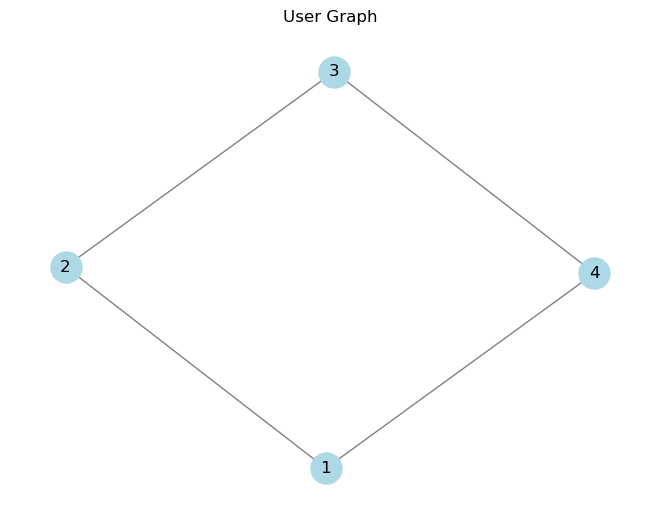

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')

plt.title("User Graph")
plt.show()

7.

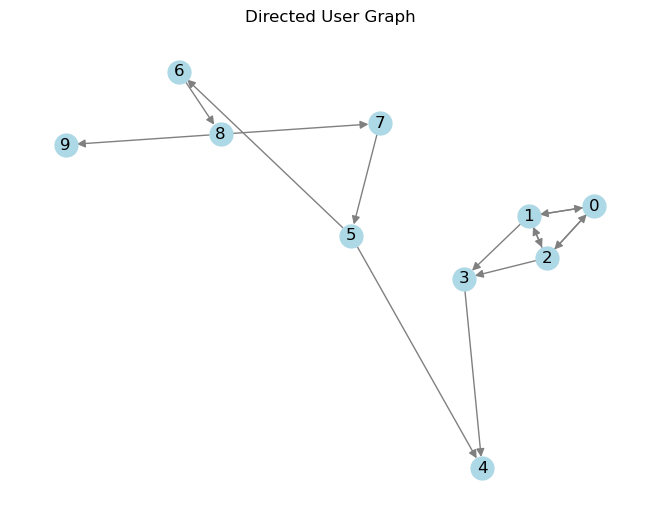

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=270, arrowsize=12, edge_color='gray')

plt.title("Directed User Graph")
plt.show()

8.

Node 0: PageRank = 0.09499069584253748
Node 1: PageRank = 0.10547659652084884
Node 2: PageRank = 0.10547659652084884
Node 3: PageRank = 0.09499069584253748
Node 4: PageRank = 0.15931683334639937
Node 5: PageRank = 0.1020112395832942
Node 6: PageRank = 0.0785753675867465
Node 7: PageRank = 0.0785753675867465
Node 8: PageRank = 0.1020112395832942
Node 9: PageRank = 0.0785753675867465


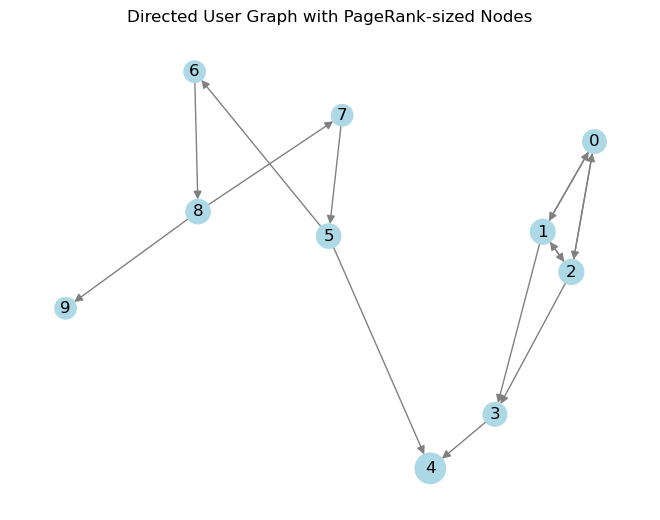

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
pagerank_values = nx.pagerank(G)
for node, pagerank in pagerank_values.items():
    print(f"Node {node}: PageRank = {pagerank}")
pos = nx.spring_layout(G)

node_sizes = [3000 * pagerank_values[node] for node in G.nodes()] 
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, arrowsize=12, edge_color='gray', cmap=plt.cm.RdYlGn)

plt.title("Directed User Graph with PageRank-sized Nodes")
plt.show()